# Normalization and regularization techniques

## Load the data

We will experiment with [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) data set. It is similar to well known MNIST data set but a bit more difficult to classify. It consists of clothing classes. The data is already shuffled and split to train and test parts.

In [1]:
%tensorflow_version 2.x
import pickle
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("X_train original shape: {}".format(X_train.shape))
print("y_train original shape: {}".format(y_train.shape))
print("X_test original shape: {}".format(X_test.shape))
print("y_test original shape: {}".format(y_test.shape))

X_train original shape: (60000, 28, 28)
y_train original shape: (60000,)
X_test original shape: (10000, 28, 28)
y_test original shape: (10000,)


Look at one random example.

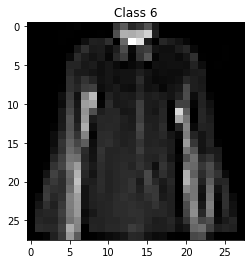

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
i=3495

#print(X_train[i])
plt.imshow(X_train[i], cmap='gray')
plt.title("Class {}".format(y_train[i]))
plt.show()

## Transform the data

We need to scale the input values to have the range (0,1).

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Reshape to 3d tensors (width, height, channels).

In [4]:
X_train3d = X_train.reshape(60000, 28, 28, 1)
X_test3d = X_test.reshape(10000, 28, 28, 1)
print("X_train matrix shape: {}".format(X_train3d.shape))
print("X_test matrix shape: {}".format(X_test3d.shape))

X_train matrix shape: (60000, 28, 28, 1)
X_test matrix shape: (10000, 28, 28, 1)


Transform the targets into one-hot encoding, i.e.


```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
```
etc.

In [5]:
from keras.utils import np_utils

n_classes = 10

print(y_train[49])

y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

print(y_train[49])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Architecture definition

This is a simple functional model for the classification problem. Your tasks are:
1. Implement [Batch](https://keras.io/api/layers/normalization_layers/batch_normalization/) and [Layer](https://keras.io/api/layers/normalization_layers/layer_normalization/) normalization and compare the accuracies.
2. Experiment with [L2 regularization](https://keras.io/api/layers/regularizers/) and [dropout](https://keras.io/api/layers/regularization_layers/dropout/). Try to maximize the validation accuracy.

In [6]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D

#Define input of the Neural Network
visible = Input(shape=(28, 28, 1, ))

#convolution 1st layer
conv1 = Conv2D(64, kernel_size=(3,3), padding="same")(visible)
activ1 = Activation('relu')(conv1)

#convolution 2nd layer
conv2 = Conv2D(64, kernel_size=(3,3), padding="same")(activ1)
activ2 = Activation('relu')(conv2)
pool2 = MaxPooling2D()(activ2)

#convolution 3rd layer
conv3 = Conv2D(64, kernel_size=(3,3), padding="same")(pool2)
activ3 = Activation('relu')(conv3)
pool3 = MaxPooling2D()(activ3)

#fully connected 4th layer
flat4 = Flatten()(pool3)
dense4 = Dense(500)(flat4)
activ4 = Activation('relu')(dense4)

#fully connected 5th layer
dense5 = Dense(10)(activ4)
output = Activation('softmax')(dense5)

model = Model(inputs=visible, outputs=output)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                             

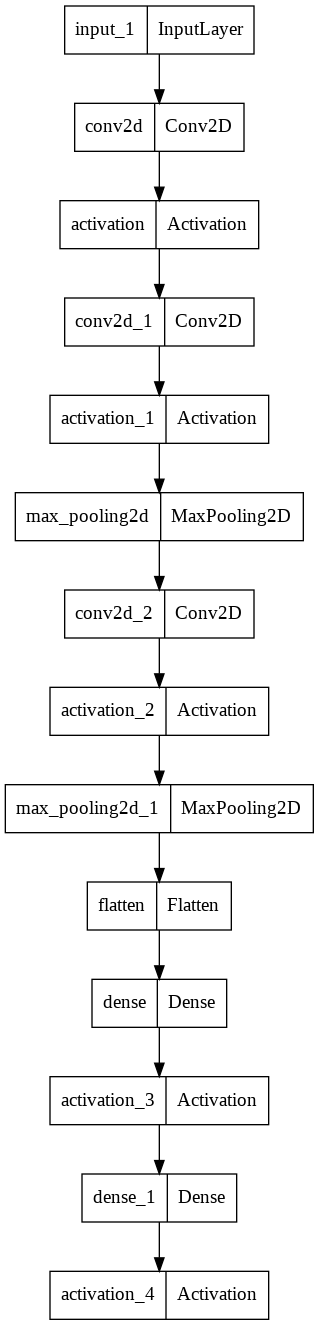

In [7]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model)

Compile and the model

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.fit(X_train3d, y_train,
          batch_size = 128, epochs = 100, verbose=1,
          validation_data=(X_test3d, y_test))

Epoch 1/100
469/469 [==============================] - 24s 27ms/step - loss: 0.4244 - accuracy: 0.8462 - val_loss: 0.3130 - val_accuracy: 0.8864
Epoch 2/100
469/469 [==============================] - 12s 25ms/step - loss: 0.2421 - accuracy: 0.9113 - val_loss: 0.2506 - val_accuracy: 0.9071
Epoch 3/100
469/469 [==============================] - 11s 24ms/step - loss: 0.1933 - accuracy: 0.9285 - val_loss: 0.2207 - val_accuracy: 0.9202
Epoch 4/100
469/469 [==============================] - 11s 24ms/step - loss: 0.1619 - accuracy: 0.9402 - val_loss: 0.2237 - val_accuracy: 0.9169
Epoch 5/100
469/469 [==============================] - 11s 24ms/step - loss: 0.1335 - accuracy: 0.9509 - val_loss: 0.2124 - val_accuracy: 0.9261
Epoch 6/100
469/469 [==============================] - 12s 26ms/step - loss: 0.1072 - accuracy: 0.9603 - val_loss: 0.2379 - val_accuracy: 0.9243
Epoch 7/100
469/469 [==============================] - 11s 24ms/step - loss: 0.0858 - accuracy: 0.9686 - val_loss: 0.2439 - val_ac